### See the following sites as references 

In [1]:
"""
References:
TAXI environment github sourcecode and description
https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py

DQN:
https://tutorials.pytorch.kr/intermediate/reinforcement_q_learning.html

Git repos:
https://github.com/gandroz/rl-taxi/blob/main/pytorch/taxi_demo_pytorch.ipynb
https://github.com/seungeunrho/minimalRL/blob/master/dqn.py
"""

'\nReferences:\nTAXI environment github sourcecode and description\nhttps://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py\n\nDQN:\nhttps://tutorials.pytorch.kr/intermediate/reinforcement_q_learning.html\n\nGit repos:\nhttps://github.com/gandroz/rl-taxi/blob/main/pytorch/taxi_demo_pytorch.ipynb\nhttps://github.com/seungeunrho/minimalRL/blob/master/dqn.py\n'

### Import packages

In [8]:
import random
from collections import deque

import gym
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from scipy.stats import ks_2samp
from IPython.display import Image

torch.manual_seed(42)  # we fix the random seed for the same wieght initialization


### Parameters for optimization
- <font color='red'> You SHOULD optimize some paramters</font>

In [9]:
# Do not change the following parameters
GAMMA=0.9
EPISODES = 15000
MEMORY_SIZE = 50000

# Optimize the following parameters:
EPSILON=1.0  # this is the "initial" Epsilon. 
             # So do NOT change this initial value, 
             # but later, it is better to decrease it in the training process.

### we intentionally changed the following parameters away from their optimized values.
### Hence, you MUST optimize the following parameters in your way
BATCH_SIZE = 32
LEARNING_RATE = 0.01
TARGET_UPDATE = 5

### Classes and Functions
- Class
    - DQN: Model class. There are two identical DQNs exist in this framework. You can change the shape of network.
         - current_dqn
         - target_dqn
    - Memory: Memory class. Implementing Experience Replay (ER) technique for DQN training
        - Save data gathered from current_dqn (called memory)
        - Give training data (randomly sampled from whole memory) to DQN
- Function
    - ε-greedy
    - Training

In [10]:
env = gym.make("Taxi-v3")

class DQN(nn.Module):
    def __init__(self):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(in_features=4, out_features=50)
        self.fc2 = nn.Linear(in_features=50, out_features=50)
        self.fc3 = nn.Linear(in_features=50, out_features=6)
        
        # He initialization for the weights (with ReLU)
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc3.weight, nonlinearity='relu')
        
    def forward(self, x):
        x = x.view(-1, 4)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
    
class Memory():
    def __init__(self):
        self.memory = deque(maxlen=MEMORY_SIZE)
        
    def put(self, transition):
        self.memory.append(transition)
        
    def sample(self, batch_size):
        mini_batch = random.sample(self.memory, batch_size)
        state_list, action_list, reward_list, nextState_list, done_list = [], [], [], [], []
        
        for transition in mini_batch:
            state, action, reward, next_state, done = transition
            state_list.append(state)
            action_list.append([action])
            reward_list.append([reward])
            nextState_list.append(next_state)
            done_list.append([done])
            
        return torch.tensor(state_list, dtype=torch.float), \
                torch.tensor(action_list), \
                torch.tensor(reward_list), \
                torch.tensor(nextState_list, dtype=torch.float), \
                torch.tensor(done_list)
    
    def size(self):
        return len(self.memory)
    
    
def epsilon_greedy(q_function, epsilon):
    if random.random() > epsilon: # greedy
        return np.argmax(q_function.detach().numpy())
    else:
        return random.randint(0, 5)

### Training function
- <font color='red'>Fill the contents</font>

In [11]:
def training(current_dqn, target_dqn, replay_memory, optimizer, gamma, batch_size):
    state, action ,reward, next_state, done = replay_memory.sample(batch_size)

    
    ##########################
    ### fill this function ###
    ##########################

    

### Main code

In [12]:
current_dqn = DQN()
target_dqn = DQN()
target_dqn.load_state_dict(current_dqn.state_dict())
replay_memory = Memory()
optimizer_adam = optim.Adam(current_dqn.parameters(), lr=LEARNING_RATE)
t = 0
epi_rewards = []
weight_changes = {k:{'stats': [], 'pval': []} for k, _ in current_dqn.named_parameters()}
weight_diff = []
#for epi in range(EPISODES):
for epi in tqdm(range(EPISODES)):
    obs = env.reset()
    obs = [i for i in env.decode(obs)] # "obs" has a value in [500]
                                       # we convert it in the form of tuple (taxi_row, taxi_col, passenger_location, destination)
                                       # where taxi_row in [5], taxi_col in [5], passenger_location in [5], destination in [4]
                                       # "If you do not want to have this conversion", you may skip this decoding part. 
    done = False
    total_reward = 0
    
    ##########################
    ### fill this function ###
    ##########################

    
    
    ########################################################
    # the following code is for logging
    epi_rewards.append(total_reward)
    

  0%|          | 0/15000 [00:00<?, ?it/s]

# Self test for convergence

Check whether model converges within 15000 episodes (in our codes, it successfully converges in 5000 episodes)
    - Observe the weight changes to make sure that it converges (weight difference decreases).
    - See the plot and check how fast does it converges.


Text(0.75, 0.2, 'This is an example')

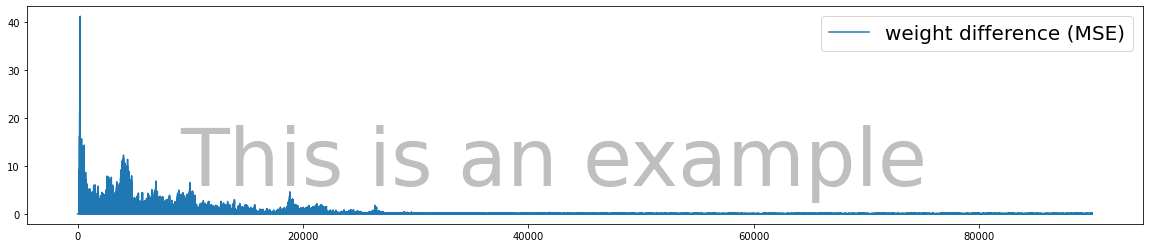

In [96]:
print("Check whether model converges within 15000 episodes (in our codes, it successfully converges in 5000 episodes)")
print("    - Observe the weight changes to make sure that it converges (weight difference decreases).")
print("    - See the plot and check how fast does it converges.")

fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(weight_diff, label='weight difference (MSE)')
ax.legend(fontsize=20)
fig.text(0.75, 0.2, 'This is an example',
         fontsize=80, color='gray',
         ha='right', va='bottom', alpha=0.5)


The variance of rewards.


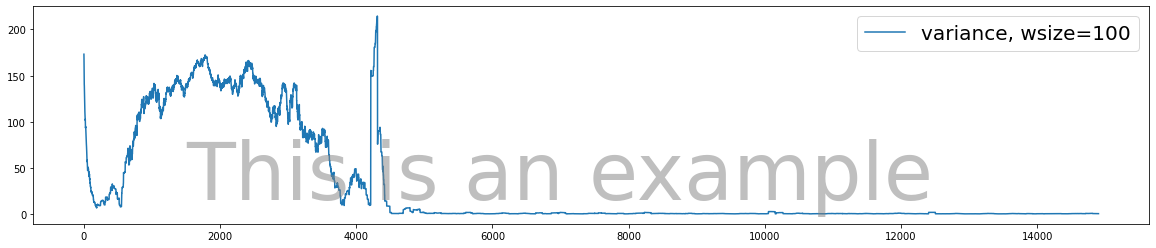

In [97]:
print("The variance of rewards.")

var = []
wsize = 100 # window size
for i in range(len(epi_rewards) - wsize):
    var.append(np.var(epi_rewards[i:i + wsize]) / wsize)
   
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(var, label='variance, wsize={}'.format(wsize))
ax.legend(fontsize=20)
fig.text(0.75, 0.15, 'This is an example',
         fontsize=80, color='gray',
         ha='right', va='bottom', alpha=0.5)

plt.savefig('var_w={}.png'.format(wsize))


# An example of evaluation

Average reward (after convergence) is  2.1105110511051106
Variance (after convergence) is  83.29121765061794
The last episode less than -200 is 4788


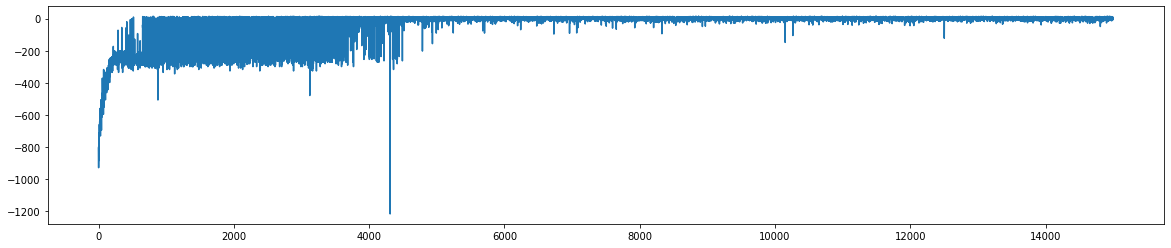

In [100]:
torch.save(current_dqn.state_dict(), '001-20_model.pth')
plt.figure(figsize=(20,4))
plt.plot(epi_rewards)
plt.savefig('001-20.png')


# We are going to examine... 
#     average reward after convergence (larger is better)
#     variance after convergence (smaller is better)
#     the last episode below the threshold (small is better)

# Below is an example of evaluation
## TA will change the values of X and threshold for evaluation
X = -10000
threshold = -200  


avg_reward = np.mean(epi_rewards[X:-1])
print("Average reward (after convergence) is ", avg_reward)
var_reward = np.var(epi_rewards[X:-1])
print("Variance (after convergence) is ", var_reward)

for i in range(len(epi_rewards)):
    if(epi_rewards[i] <= threshold):
        max_epi_threshold = i
print("The last episode less than", threshold, "is", max_epi_threshold)